In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

In [2]:
df = pd.read_csv('../documents/data/previous_data/5555_eventos-edit.csv', index_col=0)
df = df.drop('time', axis=1)

# A preliminar analysis show that the base line value is the following:
baseLine_value = 52.45771253239545
# it'll not be necessary in a future analysis, cause the conversion parameters will be retrieved from the scope on the acquisition moment.

waveforms = df - baseLine_value
waveforms

,event_0,event_1,event_2,event_3,event_4,event_5,event_6,event_7,event_8,event_9,...,event_5545,event_5546,event_5547,event_5548,event_5549,event_5550,event_5551,event_5552,event_5553,event_5554
0,3.542287,3.542287,3.542287,0.542287,2.542287,2.542287,1.542287,1.542287,1.542287,1.542287,...,1.542287,1.542287,0.542287,0.542287,-1.457713,-1.457713,-1.457713,-1.457713,-1.457713,-1.457713
1,2.542287,2.542287,2.542287,0.542287,2.542287,2.542287,1.542287,1.542287,1.542287,1.542287,...,-0.457713,-0.457713,-0.457713,-0.457713,-0.457713,-1.457713,-1.457713,-1.457713,-1.457713,-1.457713
2,0.542287,0.542287,0.542287,-1.457713,0.542287,0.542287,2.542287,2.542287,2.542287,2.542287,...,0.542287,0.542287,0.542287,0.542287,-2.457713,2.542287,2.542287,2.542287,2.542287,2.542287
3,0.542287,0.542287,0.542287,-0.457713,0.542287,0.542287,1.542287,1.542287,1.542287,1.542287,...,0.542287,0.542287,0.542287,0.542287,-2.457713,2.542287,2.542287,2.542287,2.542287,2.542287
4,1.542287,1.542287,1.542287,0.542287,2.542287,2.542287,2.542287,2.542287,2.542287,2.542287,...,-1.457713,-1.457713,0.542287,0.542287,-0.457713,1.542287,1.542287,1.542287,1.542287,1.542287
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,0.542287,0.542287,0.542287,1.542287,2.542287,2.542287,-30.457713,-30.457713,-30.457713,-30.457713,...,1.542287,1.542287,-2.457713,-2.457713,-2.457713,-0.457713,-0.457713,-0.457713,-0.457713,-0.457713
2496,2.542287,2.542287,2.542287,1.542287,3.542287,3.542287,-38.457713,-38.457713,-38.457713,-38.457713,...,-2.457713,-2.457713,-1.457713,-1.457713,0.542287,-1.457713,-1.457713,-1.457713,-1.457713,-1.457713
2497,-0.457713,-0.457713,-0.457713,0.542287,0.542287,0.542287,-15.457713,-15.457713,-15.457713,-15.457713,...,0.542287,0.542287,-1.457713,-1.457713,0.542287,-0.457713,-0.457713,-0.457713,-0.457713,-0.457713
2498,-0.457713,-0.457713,-0.457713,0.542287,1.542287,1.542287,-1.457713,-1.457713,-1.457713,-1.457713,...,-0.457713,-0.457713,0.542287,0.542287,-0.457713,-0.457713,-0.457713,-0.457713,-0.457713,-0.457713


In [3]:
from Analyze.results import Results_Analyze, plots_collection
df_filt, results = Results_Analyze(waveforms=waveforms, height=baseLine_value)



When trying to handle with the contour, a few events seem to have a problem with the contour going outside the waveform limit.
They are ['event_6', 'event_7', 'event_8', 'event_9', 'event_608', 'event_2509', 'event_5427']. 7 in total.
To solve, please check the arbitrary values for the pulse width.


0:00:13.432002


In [9]:
df_filt.head()

,event_0,event_1,event_2,event_3,event_4,event_5,event_10,event_11,event_12,event_13,...,event_5545,event_5546,event_5547,event_5548,event_5549,event_5550,event_5551,event_5552,event_5553,event_5554
0,3.542287,3.542287,3.542287,0.542287,2.542287,2.542287,0.542287,2.542287,0.542287,0.542287,...,1.542287,1.542287,0.542287,0.542287,-1.457713,-1.457713,-1.457713,-1.457713,-1.457713,-1.457713
1,2.542287,2.542287,2.542287,0.542287,2.542287,2.542287,2.542287,-0.457713,0.542287,0.542287,...,-0.457713,-0.457713,-0.457713,-0.457713,-0.457713,-1.457713,-1.457713,-1.457713,-1.457713,-1.457713
2,0.542287,0.542287,0.542287,-1.457713,0.542287,0.542287,-1.457713,0.542287,1.542287,1.542287,...,0.542287,0.542287,0.542287,0.542287,-2.457713,2.542287,2.542287,2.542287,2.542287,2.542287
3,0.542287,0.542287,0.542287,-0.457713,0.542287,0.542287,-1.457713,-0.457713,1.542287,1.542287,...,0.542287,0.542287,0.542287,0.542287,-2.457713,2.542287,2.542287,2.542287,2.542287,2.542287
4,1.542287,1.542287,1.542287,0.542287,2.542287,2.542287,-0.457713,0.542287,-0.457713,-0.457713,...,-1.457713,-1.457713,0.542287,0.542287,-0.457713,1.542287,1.542287,1.542287,1.542287,1.542287


In [10]:
results.head()

,peak_X0,peak_X1,peak_Y0,peak_Y1,integrals_0,integrals_1
event_0,94.0,1111.0,179.457713,179.457713,-590.985101,-557.651767
event_1,94.0,1111.0,179.457713,179.457713,-590.985101,-557.651767
event_2,94.0,1111.0,179.457713,179.457713,-590.985101,-557.651767
event_3,94.0,322.0,179.457713,179.457713,-639.985101,-805.985101
event_4,94.0,1815.0,179.457713,84.457713,-691.651767,-227.985101


5548 events


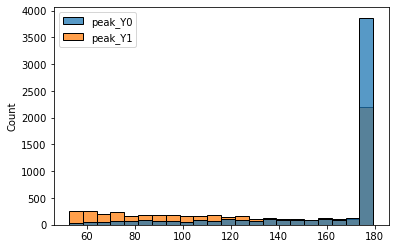

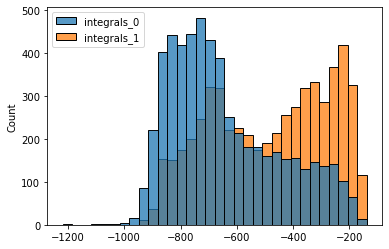

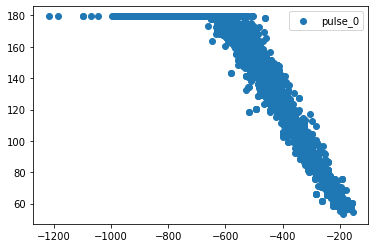

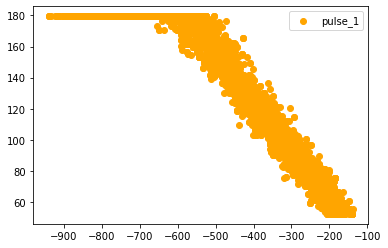

(<AxesSubplot:ylabel='Count'>,
 <AxesSubplot:ylabel='Count'>,
 <matplotlib.collections.PathCollection at 0xbb69e50>)

In [6]:
plots_collection(results=results)

4019 events


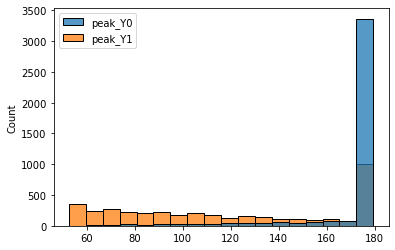

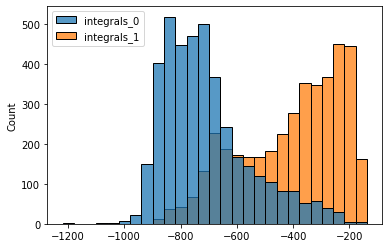

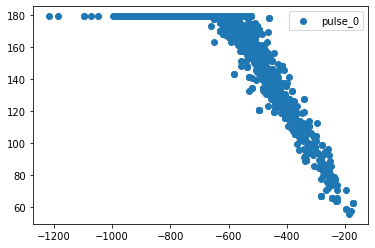

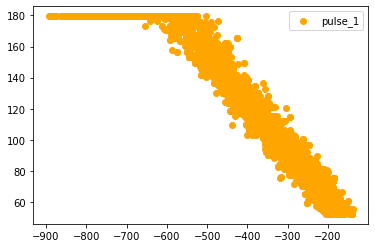

(<AxesSubplot:ylabel='Count'>,
 <AxesSubplot:ylabel='Count'>,
 <matplotlib.collections.PathCollection at 0xc448100>)

In [7]:
results_filt_integral = results.query("integrals_0 < integrals_1")
plots_collection(results_filt_integral)

1057 events


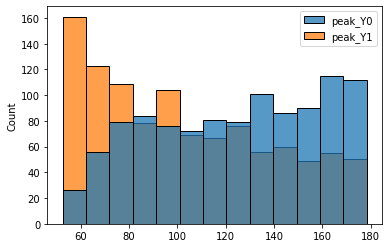

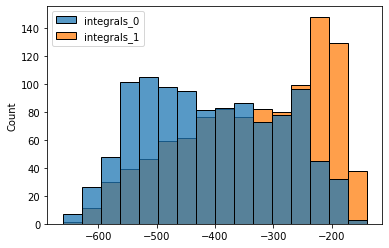

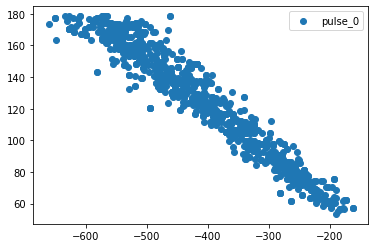

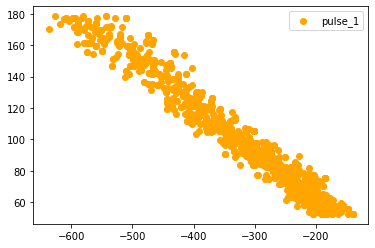

(<AxesSubplot:ylabel='Count'>,
 <AxesSubplot:ylabel='Count'>,
 <matplotlib.collections.PathCollection at 0xc1e9d90>)

In [8]:
results_filt_peaks = results.query("peak_Y0 < 179 and peak_Y1 < 179")
plots_collection(results_filt_peaks)